# SWOT



<Axes: >

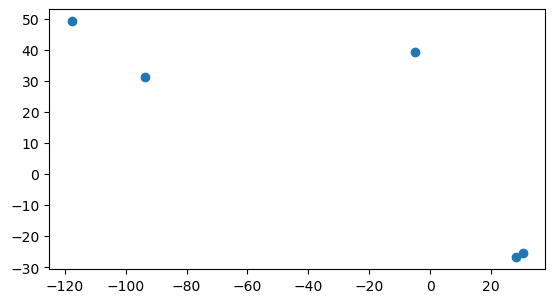

In [1]:
import geopandas as gpd
from pathlib import Path

# read the} bounding box of the study area
val_pts = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand-pts.geojson'))
val_polys = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand.geojson'))

selected_reservoirs = [
    # '0505', # dumboor. India
    # '0810', # sirindhorn, Thailand.
    # '0830', # Krasoew, Thailand.
    # '0502', # Bhakra dam, India.
    # '0518', # Bhadra, India.
    '0349', # vaaldam, South Africa.
    '0464', # Sterkspruit, South Africa.
    '0214', # Cijara, Spain
    '1498', # Toledo bend, US
    '0936', # Arrow, Canada
]

val_res_pt = val_pts.loc[val_pts['tmsos_id'].isin(selected_reservoirs)]
val_res_poly = val_polys.loc[val_polys['tmsos_id'].isin(selected_reservoirs)]

val_res_pt.plot()

In [2]:
import pandas as pd

start_date = '2024-01-01'
end_date = '2024-05-25'

# for reservoir_id in selected_reservoirs:
RESERVOIR = '0349'
print(f'{RESERVOIR}')

buffer_amt = 2000 # m
buffered_roi = val_res_poly.loc[val_res_poly['tmsos_id']==RESERVOIR].copy()
print(buffered_roi)
utm_crs = buffered_roi.estimate_utm_crs()
buffered_roi = buffered_roi.to_crs(utm_crs)
buffered_roi['geometry'] = buffered_roi.buffer(buffer_amt)
bounds = ",".join([f"{x:.3f}" for x in buffered_roi.to_crs('epsg:4326').total_bounds])
print(bounds)

podaac_cmd = [
    'podaac-data-downloader',
    '-c', 'SWOT_L2_HR_Raster_100m_2.0',
    # '-c', 'SWOT_L2_HR_Raster_1.1',
    '-d', '../data/swot/raw', 
    rf'-b="{bounds}"',
    # '-gr="SWOT_L2_HR_Raster_100m_UTM*"',
    '--start-date', pd.to_datetime(start_date).strftime('%Y-%m-%dT%XZ'),
    '--end-date', pd.to_datetime(end_date).strftime('%Y-%m-%dT%XZ'),
    # '--dry-run'
]

print(" ".join(podaac_cmd))

import subprocess

res = subprocess.run(" ".join(podaac_cmd), shell=True)
res

0349
    GRAND_ID_left RES_NAME_left DAM_NAME_left ALT_NAME_left RIVER_left  \
47           4184       Vaaldam          Vaal          None       Vaal   

   ALT_RIVER_left MAIN_BASIN_left SUB_BASIN_left NEAR_CITY_left ALT_CITY_left  \
47           None          Orange           Vaal    Deneysville   Vereeniging   

    ...        db  name rid_id grand_id  rid_filepath  resops_id  \
47  ...  deltares  None    NaN      NaN          None        NaN   

    rid_filename  tmsos_id  distance  \
47          None      0349       NaN   

                                             geometry  
47  POLYGON ((28.15111 -26.81139, 28.15220 -26.811...  

[1 rows x 129 columns]
28.060,-27.193,28.547,-26.785
podaac-data-downloader -c SWOT_L2_HR_Raster_100m_2.0 -d ../data/swot/raw -b="28.060,-27.193,28.547,-26.785" --start-date 2024-01-01T00:00:00Z --end-date 2024-05-25T00:00:00Z
[2024-05-28 09:29:58,321] {podaac_data_downloader.py:317} INFO - Found 21 total files to download
[2024-05-28 09:29:58,445] {

CompletedProcess(args='podaac-data-downloader -c SWOT_L2_HR_Raster_100m_2.0 -d ../data/swot/raw -b="28.060,-27.193,28.547,-26.785" --start-date 2024-01-01T00:00:00Z --end-date 2024-05-25T00:00:00Z', returncode=0)

## SWOT - determine pass number

In [3]:
gd_track_fn = Path('../data/swot_orbit/swot_orbit.geojson')
gd_track = gpd.read_file(gd_track_fn)
gd_track

,ID_PASS,START_TIME,geometry
0,1,Day 01 00:00:00,"MULTIPOLYGON (((-75.45870 -77.45455, -75.73434..."
1,2,Day 01 00:51:30,"MULTIPOLYGON (((84.56768 77.75119, 84.60080 78..."
2,2,Day 01 00:51:30,"MULTIPOLYGON (((-180.00000 -52.37417, -180.000..."
3,3,Day 01 01:42:50,"MULTIPOLYGON (((-110.19573 -77.57156, -110.161..."
4,4,Day 01 02:34:20,"MULTIPOLYGON (((57.70091 77.75254, 57.69643 78..."
...,...,...,...
845,582,Day 21 18:10:40,"MULTIPOLYGON (((136.37126 77.75111, 136.40526 ..."
846,582,Day 21 18:10:40,"MULTIPOLYGON (((-180.00000 72.80747, -180.0000..."
847,583,Day 21 19:02:00,"MULTIPOLYGON (((-58.39258 -77.57164, -58.35950..."
848,584,Day 21 19:53:30,"MULTIPOLYGON (((109.50449 77.75255, 109.50090 ..."


<Axes: >

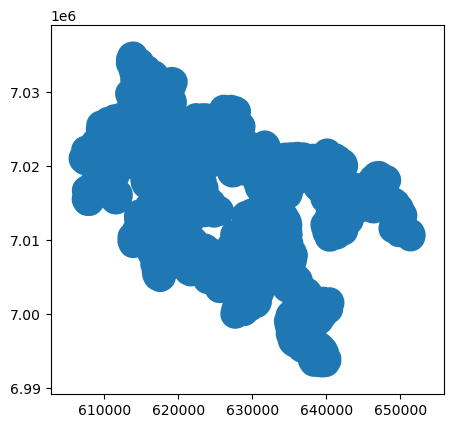

In [4]:
buffered_roi.plot()

In [5]:
buffered_roi.crs

<Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gd_track.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
gd_track

,ID_PASS,START_TIME,geometry
0,1,Day 01 00:00:00,"MULTIPOLYGON (((-75.45870 -77.45455, -75.73434..."
1,2,Day 01 00:51:30,"MULTIPOLYGON (((84.56768 77.75119, 84.60080 78..."
2,2,Day 01 00:51:30,"MULTIPOLYGON (((-180.00000 -52.37417, -180.000..."
3,3,Day 01 01:42:50,"MULTIPOLYGON (((-110.19573 -77.57156, -110.161..."
4,4,Day 01 02:34:20,"MULTIPOLYGON (((57.70091 77.75254, 57.69643 78..."
...,...,...,...
845,582,Day 21 18:10:40,"MULTIPOLYGON (((136.37126 77.75111, 136.40526 ..."
846,582,Day 21 18:10:40,"MULTIPOLYGON (((-180.00000 72.80747, -180.0000..."
847,583,Day 21 19:02:00,"MULTIPOLYGON (((-58.39258 -77.57164, -58.35950..."
848,584,Day 21 19:53:30,"MULTIPOLYGON (((109.50449 77.75255, 109.50090 ..."


/tmp/ipykernel_561649/2265061345.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis')
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

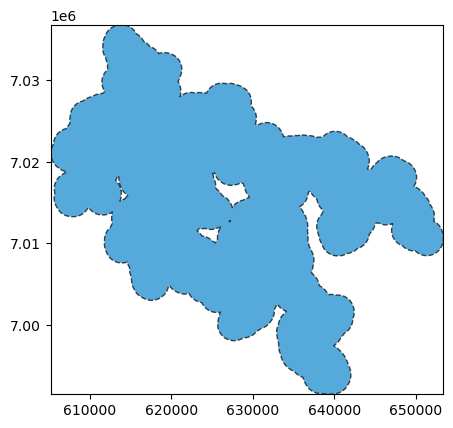

In [8]:
import matplotlib as mpl
import numpy as np

gd_track_subset = gd_track[gd_track.intersects(buffered_roi.to_crs('epsg:4326').geometry.values[0])]

cmap = mpl.cm.get_cmap('viridis')
gd_track_subset['color'] = [cmap(i) for i in np.linspace(0, 1, len(gd_track_subset.groupby('ID_PASS')))]
ax = gd_track_subset.plot(alpha=0.5, color=gd_track_subset['color'])
ax.set_xlim(int(buffered_roi.total_bounds[0])-1, int(buffered_roi.total_bounds[2])+1)
ax.set_ylim(int(buffered_roi.total_bounds[1])-1, int(buffered_roi.total_bounds[3])+1)

buffered_roi.plot(ax=ax, color='#0e87cc', alpha=0.7, linestyle='dashed', edgecolor='black')

In [9]:
gd_track_subset

,ID_PASS,START_TIME,geometry,color
319,221,Day 08 20:38:20,"MULTIPOLYGON (((-50.82783 -77.57289, -50.84426...","(0.267004, 0.004874, 0.329415, 1.0)"
664,458,Day 17 07:51:10,"MULTIPOLYGON (((-59.91605 77.75187, -59.93952 ...","(0.127568, 0.566949, 0.550556, 1.0)"
724,499,Day 18 19:00:30,"MULTIPOLYGON (((-50.45112 -77.57301, -50.43728...","(0.993248, 0.906157, 0.143936, 1.0)"


In [11]:
matches = gd_track[gd_track.intersects(buffered_roi.to_crs('epsg:4326').iloc[0].geometry)]
matches

,ID_PASS,START_TIME,geometry
319,221,Day 08 20:38:20,"MULTIPOLYGON (((-50.82783 -77.57289, -50.84426..."
664,458,Day 17 07:51:10,"MULTIPOLYGON (((-59.91605 77.75187, -59.93952 ..."
724,499,Day 18 19:00:30,"MULTIPOLYGON (((-50.45112 -77.57301, -50.43728..."


In [12]:
pass_ids = list(matches.ID_PASS)
pass_ids

[221, 458, 499]

In [28]:
import pandas as pd
from shapely.geometry import mapping
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info
from pyproj import CRS
import xarray as xr
from rioxarray.exceptions import NoDataInBounds

def get_swot_id(
        id, 
        start_date="2022-07-01", 
        end_date="2022-07-31", 
        buffer=2000, #m
        qual_mask_threshold=0.7
    ):
    roi = val_res_poly.loc[val_res_poly['tmsos_id']==id]
    buffered_roi = roi.to_crs(roi.estimate_utm_crs()).geometry.iloc[0].convex_hull.buffer(buffer)
    roi.crs = roi.estimate_utm_crs()
    roi.geometry = [buffered_roi]
    roi = roi.to_crs('epsg:4326')
    swot_dir = Path(f'../data/swot/raw')

    # determine swot pass number
    gd_track_fn = Path('../data/swot_orbit/swot_orbit.geojson')
    gd_track = gpd.read_file(gd_track_fn)

    matches = gd_track[gd_track.intersects(roi.iloc[0].geometry)]
    pass_ids = list(matches.ID_PASS)
    print(pass_ids)
    
    fns = []
    for pass_id in pass_ids:
        files = list(swot_dir.glob(f'*_{pass_id:03}_*'))
        print(files)
        fns.extend(files)

    print(len(fns), *fns, sep='\n')
    fn_dates = [fn.name.split('_')[13] for fn in fns]

    datas = []

    for fn, fn_date in zip(fns, fn_dates):
        fn_date = pd.to_datetime(fn_date)
        if fn_date < pd.to_datetime(start_date) or fn_date > pd.to_datetime(end_date):
            continue
        # data = xr.open_dataset(fn, engine='rasterio').sel(band=1)
        data = xr.open_dataset(fn, decode_coords="all")
        date = pd.to_datetime(fn.name.split('_')[13])

        data = data.assign_coords(
            reservoir=((id)),
            time=((pd.to_datetime(date.date())))
        )
        # print(data.spatial_ref.values)
        utm_crs_list = query_utm_crs_info(
            datum_name="WGS 84",
            area_of_interest=AreaOfInterest(
                west_lon_degree=data.attrs['geospatial_lon_min'],
                south_lat_degree=data.attrs['geospatial_lat_max'],
                east_lon_degree=data.attrs['geospatial_lon_max'],
                north_lat_degree=data.attrs['geospatial_lat_max'],
            ),
        )
        projection = utm_crs_list[0]
        roi = roi.to_crs(projection.code)
        data = data.rio.write_crs(projection.code)
        try:
            data = data[[
                'water_area', 'water_area_qual', 
                'water_frac', 'water_frac_uncert', 
                'wse', 'wse_uncert', 'wse_qual'
            ]].rio.clip(roi.geometry.values, crs=projection.code, drop=True)
            datas.append(data)
        except NoDataInBounds as e:
            pass

    data = xr.concat(datas, dim='time')
    
    data = data.groupby('time').mean(dim='time')

    data = data.chunk(chunks={
        'time': 30,
        'x': 4096,
        'y': 4096
    })

    return data


swot_ds = get_swot_id(RESERVOIR, '2022-01-01', '2024-05-30')
swot_ds

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[126, 141, 404]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_010_126_043F_20240129T114426_20240129T114447_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_014_126_043F_20240421T224445_20240421T224506_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_012_126_043F_20240311T051434_20240311T051455_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_011_126_043F_20240219T082931_20240219T082952_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_013_126_043F_20240401T015938_20240401T015959_PIC0_01.nc')]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_013_141_112F_20240401T151424_20240401T151445_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_015_141_112F_20240513T084434_20240513T084455_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_010_141_112F_20240130T005912_20240130T005

<xarray.Dataset> Size: 24MB
Dimensions:            (time: 12, y: 260, x: 272)
Coordinates:
  * x                  (x) float64 2kB 3.239e+05 3.24e+05 ... 3.509e+05 3.51e+05
  * y                  (y) float64 2kB 4.342e+06 4.342e+06 ... 4.368e+06
    reservoir          <U4 16B '0214'
    spatial_ref        int64 8B 0
    crs                int64 8B 0
  * time               (time) datetime64[ns] 96B 2024-01-30 ... 2024-05-22
Data variables:
    water_area         (time, y, x) float32 3MB dask.array<chunksize=(12, 260, 272), meta=np.ndarray>
    water_area_qual    (time, y, x) float32 3MB dask.array<chunksize=(12, 260, 272), meta=np.ndarray>
    water_frac         (time, y, x) float32 3MB dask.array<chunksize=(12, 260, 272), meta=np.ndarray>
    water_frac_uncert  (time, y, x) float32 3MB dask.array<chunksize=(12, 260, 272), meta=np.ndarray>
    wse                (time, y, x) float32 3MB dask.array<chunksize=(12, 260, 272), meta=np.ndarray>
    wse_uncert         (time, y, x) float32 3MB dask.array<chunksize=(12, 260, 272), meta=np.ndarray>
    wse_qual           (time, y, x) float32 3MB dask.array<chunksize=(12, 260, 272), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                   CF-1.7
    title:                         Level 2 KaRIn High Rate Raster Data Product
    source:                        Ka-band radar interferometer
    history:                       2024-04-05T06:37:09Z : Creation
    platform:                      SWOT
    references:                    V1.2.1
    ...                            ...
    x_min:                         272200.0
    x_max:                         427500.0
    y_min:                         4272700.0
    y_max:                         4428000.0
    institution:                   CNES
    product_version:               01

# Plot

In [29]:
import holoviews as hv
import hvplot.xarray

ds = swot_ds

ds['wse'].hvplot(
    x='x', y='y', rasterize=True, aspect='equal', clim=(80, 100) # , geo=True, # crs=ds.rio.crs
).opts(
    title='Water Surface Elevation (m)'
) + ds['wse_uncert'].hvplot(
    x='x', y='y', rasterize=True, clim=(0, 1), aspect='equal', cmap='RdYlBu_r' #  geo=True, crs=ds.rio.crs
).opts(
    title='Water Surface Elevation Uncertainty (m)'
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'7a02bbb5-5651-401e-bb4e-5f0370ddf37a': {'version…

In [30]:
import holoviews as hv

swot_ds['water_frac'].hvplot(
    x='x', y='y', rasterize=True, aspect='equal', clim=(0, 1) # , geo=True, # crs=swot_ds.rio.crs
).opts(
    title='Water Fraction'
) + swot_ds['water_frac_uncert'].hvplot(
    x='x', y='y', rasterize=True, clim=(0, 1), aspect='equal', cmap='RdYlBu_r' #  geo=True, crs=swot_ds.rio.crs
).opts(
    title='Water Fraction Uncertainty'
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'703b1f48-6a13-4d5c-910c-77ac203f2c5d': {'version…

In [31]:
import holoviews as hv

swot_ds['water_area'].hvplot(
    x='x', y='y', rasterize=True, aspect='equal', clim=(0, 1e4) # , geo=True, # crs=swot_ds.rio.crs
).opts(
    title='Water Area'
) + swot_ds['water_area_qual'].hvplot(
    x='x', y='y', rasterize=True, clim=(0, 3), aspect='equal', cmap='RdYlBu_r' #  geo=True, crs=swot_ds.rio.crs
).opts(
    title='Water Area Quality (0=nominal,1=suspect,2=degraded,3=bad)'
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'d65f181d-f49f-42bd-89d3-f8954912efdc': {'version…

### Process selected reservoirs at once

In [33]:
for RESERVOIR in selected_reservoirs:
    print(f'{RESERVOIR}')

    val_res_poly.loc[val_res_poly['tmsos_id']==RESERVOIR]

    buffer_amt = 0.05
    buffered_roi = val_res_poly.loc[val_res_poly['tmsos_id']==RESERVOIR].copy()
    buffered_roi['geometry'] = buffered_roi.buffer(buffer_amt)
    bounds = ",".join([f"{x:.3f}" for x in buffered_roi.total_bounds])
    print(bounds)

    podaac_cmd = [
        'podaac-data-downloader',
        '-c', 'SWOT_L2_HR_Raster_100m_2.0',
        '-d', '../data/swot/raw', f'-b={bounds}',
        '--start-date', pd.to_datetime(start_date).strftime('%Y-%m-%dT%XZ'),
        '--end-date', pd.to_datetime(end_date).strftime('%Y-%m-%dT%XZ'),
    ]

    # print(" ".join(podaac_cmd))

    import subprocess

    subprocess.run(podaac_cmd)

    swot_ds = get_swot_id(RESERVOIR, '2022-01-01', '2024-05-30')
    save_fp = Path(f'../data/swot/{RESERVOIR}.nc')
    swot_ds.to_netcdf(save_fp)

0349


/tmp/ipykernel_561649/3159160187.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_roi['geometry'] = buffered_roi.buffer(buffer_amt)


28.030,-27.225,28.576,-26.753
[2024-05-28 09:44:45,622] {podaac_data_downloader.py:317} INFO - Found 21 total files to download
[2024-05-28 09:44:45,745] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:44:45.744945 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM35J_N_x_x_x_015_458_101F_20240524T162932_20240524T162953_PIC0_01.nc
[2024-05-28 09:44:45,919] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:44:45.919625 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_416_015F_20240523T040006_20240523T040027_PIC0_01.nc
[2024-05-28 09:44:46,076] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:44:46.076274 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_323_138F_20240519T205636_20240

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[221, 458, 499]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM35J_N_x_x_x_013_221_054F_20240404T113049_20240404T113111_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM35J_N_x_x_x_015_221_054F_20240516T050100_20240516T050121_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM35J_N_x_x_x_012_221_054F_20240314T144545_20240314T144606_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM35J_N_x_x_x_014_221_054F_20240425T081556_20240425T081617_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM35J_N_x_x_x_011_221_054F_20240222T180043_20240222T180104_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM35J_N_x_x_x_010_221_054F_20240201T211538_20240201T211559_PIC0_01.nc')]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM35J_N_x_x_x_015_458_101F_20240524T162932_20240524T162953_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM35J_N_x_x_x_010_458_101F_20240210T084411_20240210T084

/tmp/ipykernel_561649/3159160187.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_roi['geometry'] = buffered_roi.buffer(buffer_amt)


[2024-05-28 09:46:24,893] {podaac_data_downloader.py:317} INFO - Found 16 total files to download
[2024-05-28 09:46:25,016] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:46:25.016466 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM36J_N_x_x_x_015_430_100F_20240523T162841_20240523T162903_PIC0_01.nc
[2024-05-28 09:46:25,191] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:46:25.191672 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_416_015F_20240523T040006_20240523T040027_PIC0_01.nc
[2024-05-28 09:46:25,348] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:46:25.348268 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_323_138F_20240519T205636_20240519T205657_PIC0_01.nc
[2024-05

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[193, 430]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM36J_N_x_x_x_015_193_055F_20240515T050049_20240515T050110_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM36J_N_x_x_x_013_193_055F_20240403T113039_20240403T113100_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM36J_N_x_x_x_011_193_055F_20240221T180032_20240221T180053_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM36J_N_x_x_x_014_193_055F_20240424T081545_20240424T081606_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM36J_N_x_x_x_010_193_055F_20240131T211527_20240131T211548_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM36J_N_x_x_x_012_193_055F_20240313T144534_20240313T144555_PIC0_01.nc')]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM36J_N_x_x_x_014_430_100F_20240502T194336_20240502T194358_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM36J_N_x_x_x_011_430_100F_20240301T052825_20240301T052846_P

/tmp/ipykernel_561649/3159160187.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_roi['geometry'] = buffered_roi.buffer(buffer_amt)


[2024-05-28 09:46:31,556] {podaac_data_downloader.py:317} INFO - Found 19 total files to download
[2024-05-28 09:46:31,768] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:46:31.768061 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_416_015F_20240523T040006_20240523T040027_PIC0_01.nc
[2024-05-28 09:46:31,839] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:46:31.839651 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_015_404_043F_20240522T175204_20240522T175226_PIC0_01.nc
[2024-05-28 09:46:31,995] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:46:31.995922 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_323_138F_20240519T205636_20240519T205657_PIC0_01.nc
[2024-05

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[126, 141, 404]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_010_126_043F_20240129T114426_20240129T114447_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_014_126_043F_20240421T224445_20240421T224506_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_012_126_043F_20240311T051434_20240311T051455_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_011_126_043F_20240219T082931_20240219T082952_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_013_126_043F_20240401T015938_20240401T015959_PIC0_01.nc')]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_013_141_112F_20240401T151424_20240401T151445_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_015_141_112F_20240513T084434_20240513T084455_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM30S_N_x_x_x_010_141_112F_20240130T005912_20240130T005

/tmp/ipykernel_561649/3159160187.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_roi['geometry'] = buffered_roi.buffer(buffer_amt)


-93.986,31.088,-93.516,31.964
[2024-05-28 09:46:43,292] {podaac_data_downloader.py:317} INFO - Found 39 total files to download
[2024-05-28 09:46:43,501] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:46:43.501870 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_416_015F_20240523T040006_20240523T040027_PIC0_01.nc
[2024-05-28 09:46:43,658] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:46:43.658363 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_323_138F_20240519T205636_20240519T205657_PIC0_01.nc
[2024-05-28 09:46:43,814] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:46:43.814366 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM15R_N_x_x_x_015_272_050F_20240518T004324_20240

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[259, 272, 537]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15S_N_x_x_x_012_259_106F_20240315T233804_20240315T233825_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15R_N_x_x_x_011_259_105F_20240224T025242_20240224T025303_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15R_N_x_x_x_012_259_105F_20240315T233744_20240315T233805_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15R_N_x_x_x_014_259_105F_20240426T170755_20240426T170816_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15S_N_x_x_x_010_259_106F_20240203T060757_20240203T060818_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15S_N_x_x_x_011_259_106F_20240224T025302_20240224T025323_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15S_N_x_x_x_013_259_106F_20240405T202308_20240405T202329_PIC0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15R_N_x_x_x_015_259_105F_20240517T135259_20240517T1353

/tmp/ipykernel_561649/3159160187.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_roi['geometry'] = buffered_roi.buffer(buffer_amt)


-118.264,49.285,-117.663,51.031
[2024-05-28 09:47:09,492] {podaac_data_downloader.py:317} INFO - Found 76 total files to download
[2024-05-28 09:47:09,702] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:47:09.702799 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_416_015F_20240523T040006_20240523T040027_PIC0_01.nc
[2024-05-28 09:47:09,867] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:47:09.867817 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_015_323_138F_20240519T205636_20240519T205657_PIC0_01.nc
[2024-05-28 09:47:09,994] {podaac_data_downloader.py:350} INFO - 2024-05-28 09:47:09.994394 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM11U_N_x_x_x_015_317_123F_20240519T154255_202

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[11, 190, 289, 317, 468, 496]
[PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM14R_N_x_x_x_501_011_104F_20230425T025416_20230425T025437_PIB0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM14T_N_x_x_x_490_011_114F_20230414T044038_20230414T044058_PIB0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15U_N_x_x_x_493_011_124F_20230417T041550_20230417T041611_PIB0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM14S_N_x_x_x_497_011_107F_20230421T033244_20230421T033304_PIB0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM14S_N_x_x_x_492_011_106F_20230416T041915_20230416T041935_PIB0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15T_N_x_x_x_498_011_119F_20230422T032720_20230422T032741_PIB0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM15T_N_x_x_x_486_011_119F_20230410T051945_20230410T052006_PIB0_01.nc'), PosixPath('../data/swot/raw/SWOT_L2_HR_Raster_100m_UTM14S_N_x_x_x_495_011_106F_20230419T035108

PermissionError: [Errno 13] Permission denied: '/tiger1/pdas47/tmsosPP/data/swot/0936.nc'

## save

In [ ]:
save_fp = Path(f'../data/swot/{RESERVOIR}.nc')
swot_ds.to_netcdf(save_fp)